# Predict whether a person has diabetes or not, using PimaIndianDiabetes (Kaggle)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
origin_data = pd.read_csv('diabetes.csv')
data = origin_data.copy()

In [ ]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data.shape

(768, 9)

Only 800 records. Not that much.

In [4]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

No object or strange string type. That's good to know.

In [7]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No null values either.

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

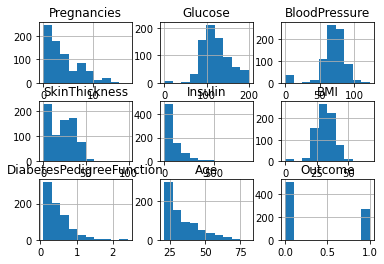

In [21]:
data.hist()

There are zeros in 'BMI', 'Insulin', 'BloodPressure',... which is impossible. Must check later.

In [14]:
for col in X.columns:
    print("{column} : {count}".format(column=col, count=data[data[col] == 0].shape[0]))

Pregnancies : 111
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0


How odd, thers is a lot of zeros in 'Insulin' and 'SkinThickness'

In [17]:
zero_insulin = data[data['Insulin'] == 0].drop(columns=['Insulin'])
zero_insulin.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
5,5,116,74,0,25.6,0.201,30,0
7,10,115,0,0,35.3,0.134,29,0


<AxesSubplot:xlabel='Outcome', ylabel='Count'>

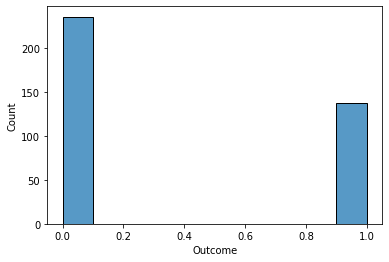

In [16]:
sns.histplot(data=zero_insulin, x='Outcome')

In [19]:
zero_insulin.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,4.433155,119.409091,67.473262,11.508021,30.943316,0.415340,35.796791,0.368984
std,3.437621,32.544233,24.522312,15.738605,8.419854,0.300547,12.729034,0.483176
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.250000,64.000000,0.000000,26.500000,0.209000,25.000000,0.000000
50%,4.000000,115.000000,72.000000,0.000000,31.200000,0.302500,32.000000,0.000000
75%,7.000000,138.000000,80.000000,26.750000,35.675000,0.553250,43.000000,1.000000
max,14.000000,199.000000,122.000000,99.000000,52.900000,1.893000,72.000000,1.000000


In [20]:
print("Zero SkinThickness count in zero_insulin: {}".format(zero_insulin[zero_insulin['SkinThickness'] == 0].shape[0]))

Zero SkinThickness count in zero_insulin: 227


Okay, all zero_SkinThickness records are in zero_insulin. Perhaps they are not recorded. But why?